In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
# MNIST Image -> tensor
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='data/', train=True, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
test_data = datasets.MNIST(root='data/', train=False, download=True, transform=transform)

In [ ]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data/
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset MNIST
     Number of datapoints: 10000
     Root location: data/
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [ ]:
train_data[0]  # 28*28, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
image, label = train_data[0]

In [ ]:
image.shape  # 1 : grey scale

torch.Size([1, 28, 28])

In [ ]:
type(label), label

(int, 5)

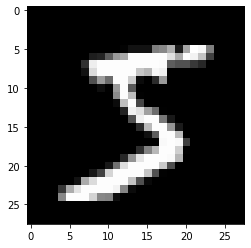

In [ ]:
plt.imshow(image.reshape((28,28)), cmap='gray')

In [ ]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)  # shuffle : sometimes data are in order
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [ ]:
from torchvision.utils import make_grid 

np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [ ]:
# first batch
for images, labels in train_loader:
  break
  

In [ ]:
images.shape

torch.Size([100, 1, 28, 28])

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


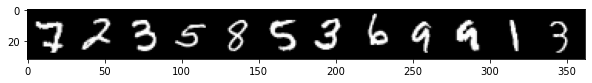

In [ ]:
print('Labels: ', labels[:12].numpy())

im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [ ]:
im.shape

torch.Size([3, 32, 362])

In [ ]:
# create model
class MultiLayerPerceptron(nn.Module):
  def __init__(self,in_sz=784, out_sz=10, layers=[120,84]):
    super().__init__()

    self.fc1 = nn.Linear(in_sz,layers[0])
    self.fc2 = nn.Linear(layers[0],layers[1])
    self.fc3 = nn.Linear(layers[1],out_sz)

  def forward(self,X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X,dim=1)

In [ ]:
torch.manual_seed(101)
model = MultiLayerPerceptron()
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# ANN --> CNN
for param in model.parameters():
  print(param.numel())

94080
120
10080
84
840
10


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
images.shape   # [100, 1, 28, 28] -> [100,784]

torch.Size([100, 1, 28, 28])

In [ ]:
images.view(100,-1).shape

torch.Size([100, 784])

In [ ]:
import time

start_time = time.time()

# training
epochs = 10

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train.view(100,-1))
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%200 == 0:
      acc = trn_corr.item()*100 / (100*b)
      print(f'Epoch {i}  batch {b}  loss: {loss.item()}  accuracy: {acc} ')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test.view(500,-1))
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted==y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins') 

Epoch 0  batch 200  loss: 0.2354130893945694  accuracy: 83.25 
Epoch 0  batch 400  loss: 0.3537280559539795  accuracy: 87.5275 
Epoch 0  batch 600  loss: 0.13648736476898193  accuracy: 89.57333333333334 
Epoch 1  batch 200  loss: 0.24467898905277252  accuracy: 94.805 
Epoch 1  batch 400  loss: 0.14542990922927856  accuracy: 95.0625 
Epoch 1  batch 600  loss: 0.07299499213695526  accuracy: 95.35666666666667 
Epoch 2  batch 200  loss: 0.08716949820518494  accuracy: 96.5 
Epoch 2  batch 400  loss: 0.0669819787144661  accuracy: 96.595 
Epoch 2  batch 600  loss: 0.06888754665851593  accuracy: 96.67833333333333 
Epoch 3  batch 200  loss: 0.11644277721643448  accuracy: 97.665 
Epoch 3  batch 400  loss: 0.058142390102148056  accuracy: 97.485 
Epoch 3  batch 600  loss: 0.03187106177210808  accuracy: 97.49666666666667 
Epoch 4  batch 200  loss: 0.11606234312057495  accuracy: 98.115 
Epoch 4  batch 400  loss: 0.04627266898751259  accuracy: 97.975 
Epoch 4  batch 600  loss: 0.052832409739494324  a

NameError: ignored

In [ ]:
total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins') 

Duration: 1.541721192995707 mins


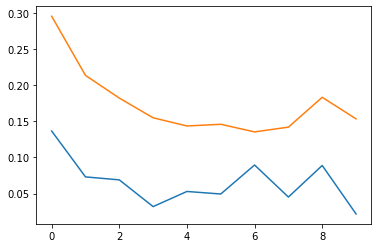

In [ ]:
plt.plot(train_losses)
plt.plot(test_losses)

In [ ]:
train_acc = [t/600 for t in train_correct]

In [ ]:
train_acc

[tensor(89.5733),
 tensor(95.3567),
 tensor(96.6783),
 tensor(97.4967),
 tensor(97.9883),
 tensor(98.4133),
 tensor(98.6783),
 tensor(98.9600),
 tensor(99.1050),
 tensor(99.2867)]

In [ ]:
test_acc = [t/100 for t in test_correct]

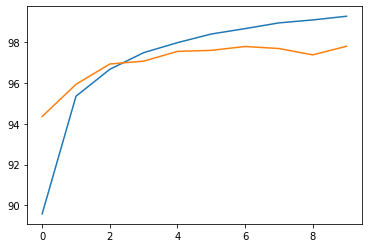

In [ ]:
plt.plot(train_acc)
plt.plot(test_acc)

In [ ]:
# New unseen data
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_all:
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted==y_test).sum()

In [ ]:
correct.item()*100/len(test_data)

97.81